In [1]:
!pip install fbprophet

In [2]:
!pip install pandas-datareader

In [3]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px
import fbprophet.plot as fp
import plotly.io as pio
from datetime import datetime
import pandas_datareader.data as pdr
import numpy as np 
pio.renderers.default = "colab"

In [32]:
#Getting doday's date
end = datetime.today()
#Start date set to five years back
start = datetime(end.year-6,end.month,end.day)
#using fred to grab cryptocurrency (ETH coinbase) data
code = 'CBETHUSD'
ETH = pdr.DataReader(code,'fred',start,end)
# print first 10 item to std I/O
ETH["CBETHUSD"] = ETH["CBETHUSD"].fillna(1.0)
ETH.head(10)

,CBETHUSD
DATE,
2016-05-18,13.18
2016-05-19,14.90
2016-05-20,14.17
2016-05-21,1.00
2016-05-22,1.00
2016-05-23,13.61
2016-05-24,12.77
2016-05-25,12.61
2016-05-26,12.47


In [33]:
ETH.to_csv('./CB_ETH_USD_fred.csv')

In [34]:
from google.colab import files

In [35]:
files.download('/content/CB_ETH_USD_fred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
uploaded = files.upload()

Saving ETH-USD_CB_5yrs_fred2.csv to ETH-USD_CB_5yrs_fred2.csv


In [39]:
!ls

 CB_ETH_USD_fred.csv		 ETH-USD_CB_5yrs_fred2.csv   sample_data
'ETH-USD_CB_5yrs_fred (1).csv'	 ETH-USD_CB_5yrs_fred.csv


In [40]:
df = pd.read_csv('/content/ETH-USD_CB_5yrs_fred2.csv')

In [41]:
df['y'] = np.log(df['y'])

In [42]:
df.head(5)

,ds,y
0,5/18/2016,2.578701
1,5/19/2016,2.701361
2,5/20/2016,2.651127
3,5/21/2016,0.000000
4,5/22/2016,0.000000


In [43]:
model = Prophet(daily_seasonality = True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [44]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2433,2023-01-15
2434,2023-01-16
2435,2023-01-17
2436,2023-01-18
2437,2023-01-19


In [45]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2433,2023-01-15,10.414408,8.229180,12.670840
2434,2023-01-16,10.434228,8.241854,12.671931
2435,2023-01-17,10.445546,8.223442,12.680938
2436,2023-01-18,10.457935,8.290661,12.722290
2437,2023-01-19,10.466515,8.269064,12.818260


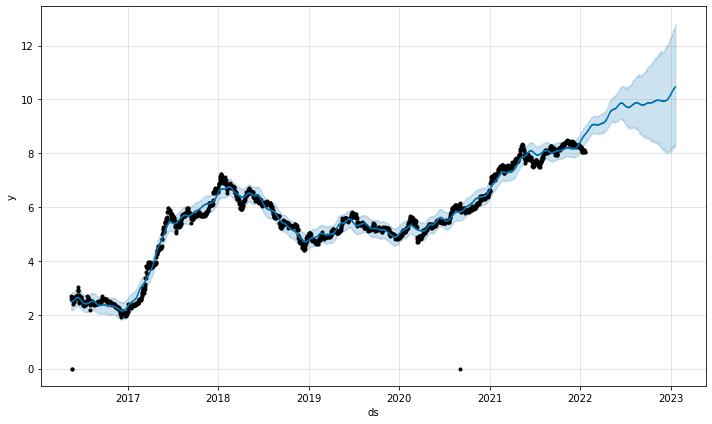

In [46]:
model.plot(forecast);

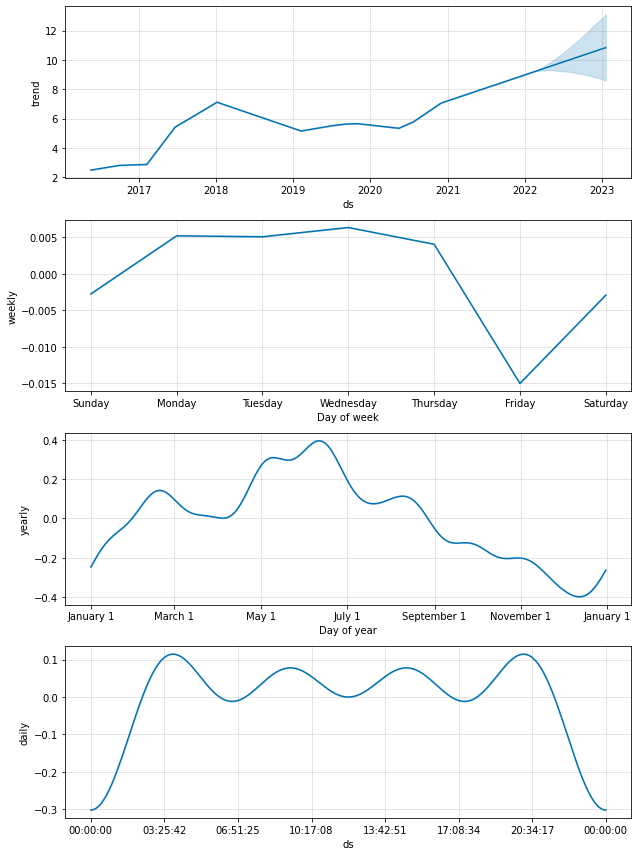

In [47]:
model.plot_components(forecast);

In [48]:
fig = fp.plot_plotly(model, forecast) 
fig.show()

In [49]:
!nvidia-smi

Thu Jan 20 12:54:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------